# Imports

In [1]:
from pathlib import Path
import sys
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#pd.__version__

# Set configuration

In [5]:
XSMALL_SIZE = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=XSMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=XSMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=XSMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

pd.set_option('display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

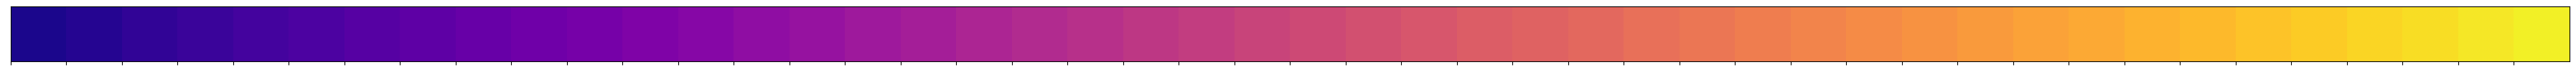

In [6]:
custom_states = sns.color_palette("plasma", 46) #as the number of states
sns.palplot(custom_states)

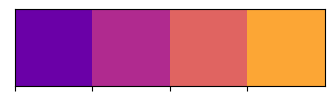

In [7]:
color_quarters = sns.color_palette("plasma", 4)
sns.palplot(color_quarters)

# Read datasets

In [8]:
root_path = Path(os.getcwd())
start_path = str(root_path.parent.parent)
df_colony = pd.read_csv(start_path + "/data/colony.csv")
df_stressor = pd.read_csv(start_path + "/data/stressor.csv")

In [9]:
df_colony.head()

year         months       state   colony_n  colony_max  colony_lost  \
0  2015  January-March     Alabama     7000.0      7000.0       1800.0   
1  2015  January-March     Arizona    35000.0     35000.0       4600.0   
2  2015  January-March    Arkansas    13000.0     14000.0       1500.0   
3  2015  January-March  California  1440000.0   1690000.0     255000.0   
4  2015  January-March    Colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  
0             26.0        2800.0        250.0              4.0  
1             13.0        3400.0       2100.0              6.0  
2             11.0        1200.0         90.0              1.0  
3             15.0      250000.0     124000.0              7.0  
4             12.0         200.0        140.0              1.0

In [10]:
#display(df_stressor.to_string())
#print(df_stressor.to_markdown())
df_stressor.head()

year         months    state               stressor  stress_pct
0  2015  January-March  Alabama           Varroa mites        10.0
1  2015  January-March  Alabama  Other pests/parasites         5.4
2  2015  January-March  Alabama              Disesases         NaN
3  2015  January-March  Alabama             Pesticides         2.2
4  2015  January-March  Alabama                  Other         9.1

In [11]:
#map the trimesters into Q1, Q2, Q3, Q4 to guarantee the alphabetical order while grouping
map_quarters = {
    "January-March": "Q1",
    "April-June": "Q2",
    "July-September": "Q3",
    "October-December": "Q4"
}
df_colony['months'] = df_colony['months'].map(map_quarters)
df_stressor['months'] = df_stressor['months'].map(map_quarters)

In [12]:

df_new_stressor = pd.pivot_table(df_stressor, values = 'stress_pct', index = ['year', 'months', 'state'], columns = ['stressor'], sort=False) #fill_value = 0
df_new_stressor.head()


stressor                Disesases  Other  Other pests/parasites  Pesticides  \
year months state                                                             
2015 Q1     Alabama           NaN    9.1                    5.4         2.2   
            Arizona           0.1    1.8                   20.5         NaN   
            Arkansas          1.5    1.0                   11.4         3.4   
            California        3.0    6.5                    7.2         7.5   
            Colorado          1.8    2.6                    0.9         0.6   

stressor                Unknown  Varroa mites  
year months state                              
2015 Q1     Alabama         9.4          10.0  
            Arizona         3.1          26.9  
            Arkansas        1.0          17.6  
            California      2.8          24.7  
            Colorado        5.9          14.6

In [13]:
stressors = df_new_stressor.columns.tolist()
stressors

['Disesases',
 'Other',
 'Other pests/parasites',
 'Pesticides',
 'Unknown',
 'Varroa mites']

In [14]:
#create MultiIndex in colony dataset
df_colony = df_colony.set_index(['year', 'months', 'state'])
df_colony.head()
#merge the two datasets
dfs = [df_colony, df_new_stressor]
df_years = pd.concat(dfs, axis=1)
df_years.head(50)

#df_years.index.names
#df_years.index.values
#df_years.reset_index()

#add name 'stressor' to stressor columns
#stressor_names = list(map(lambda x: 'Stressor_' + x,list(df_years.columns)[7:]))
#df_years.columns = df_years.columns.tolist()[:7] + stressor_names


colony_n  colony_max  colony_lost  \
year months state                                                
2015 Q1     Alabama            7000.0      7000.0       1800.0   
            Arizona           35000.0     35000.0       4600.0   
            Arkansas          13000.0     14000.0       1500.0   
            California      1440000.0   1690000.0     255000.0   
            Colorado           3500.0     12500.0       1500.0   
            Connecticut        3900.0      3900.0        870.0   
            Florida          305000.0    315000.0      42000.0   
            Georgia          104000.0    105000.0      14500.0   
            Hawaii            10500.0     10500.0        380.0   
            Idaho             81000.0     88000.0       3700.0   
            Illinois           6000.0     10500.0       4200.0   
            Indiana            9000.0      9500.0       2100.0   
            Iowa              12500.0     17500.0       3100.0   
            Kansas             4600.0      7000.0       1600.0   
            Kentucky           7500.0     10500.0       4100.0   
            Louisiana         51000.0     51000.0       8000.0   
            Maine              3100.0      6500.0        380.0   
            Maryland           7500.0     10000.0       4100.0   
            Massachusetts      2900.0      4600.0       1000.0   
            Michigan          16500.0     60000.0      11500.0   
            Minnesota         28000.0     74000.0       3700.0   
            Mississippi       34000.0     76000.0       8500.0   
            Missouri          12000.0     13000.0       2000.0   
            Montana            8500.0     36000.0       2200.0   
            Nebraska          10000.0     31000.0       2600.0   
            New Jersey         6000.0      9000.0       1100.0   
            New Mexico         7000.0      7000.0        690.0   
            New York          27000.0     30000.0       6500.0   
            North Carolina    24000.0     26000.0       7000.0   
            North Dakota      57000.0    120000.0        620.0   
            Ohio              18000.0     22000.0      10500.0   
            Oklahoma           9500.0     26000.0       6000.0   
            Oregon            77000.0     87000.0       6500.0   
            Pennsylvania      14000.0     21000.0       6500.0   
            South Carolina    17000.0     17500.0       2700.0   
            South Dakota      50000.0     97000.0       4600.0   
            Tennessee          9500.0      9500.0       2000.0   
            Texas            191000.0    250000.0      26000.0   
            Utah               6000.0     24000.0       3300.0   
            Vermont            5500.0      5500.0        700.0   
            Virginia           8000.0      9000.0       2500.0   
            Washington        52000.0    105000.0      14000.0   
            West Virginia      4700.0      6000.0       1800.0   
            Wisconsin         16500.0     29000.0       8000.0   
            Wyoming            5500.0     12000.0       2000.0   
            Other States       3410.0      8990.0       2080.0   
            United States   2824610.0         NaN     500020.0   
     Q2     Alabama            7500.0      7500.0        860.0   
            Arizona           33000.0     33000.0       5500.0   
            Arkansas          13500.0     13500.0       1900.0   

                            colony_lost_pct  colony_added  colony_reno  \
year months state                                                        
2015 Q1     Alabama                    26.0        2800.0        250.0   
            Arizona                    13.0        3400.0       2100.0   
            Arkansas                   11.0        1200.0         90.0   
            California                 15.0      250000.0     124000.0   
            Colorado                   12.0         200.0        140.0   
            Connecticut                22.0         290.0          NaN   
    

In [15]:
#df is the merged dataset without the MultiIndex
df = df_years.reset_index()
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     Alabama     7000.0      7000.0       1800.0   
1  2015     Q1     Arizona    35000.0     35000.0       4600.0   
2  2015     Q1    Arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  California  1440000.0   1690000.0     255000.0   
4  2015     Q1    Colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Disesases  \
0             26.0        2800.0        250.0              4.0        NaN   
1             13.0        3400.0       2100.0              6.0        0.1   
2             11.0        1200.0         90.0              1.0        1.5   
3             15.0      250000.0     124000.0              7.0        3.0   
4             12.0         200.0        140.0              1.0        1.8   

   Other  Other pests/parasites  Pesticides  Unknown  Varroa mites  
0    9.1                    5.4         2.2      9.4          10.0  
1    1.8                   20.5         NaN      3.1          26.9  
2    1.0                   11.4         3.4      1.0          17.6  
3    6.5                    7.2         7.5      2.8          24.7  
4    2.6                    0.9         0.6      5.9          14.6

In [16]:
#check the number of states
len(df.state.unique()) #46 states + "United States"

47

In [17]:
#Extract United States dataset
#df_US = df.loc[(slice(None), slice(None), 'United States'),:]
df_US = df[df.state == 'United States']
df_US.drop(columns = ["state"], inplace=True)
df_years.drop(index = "United States", level=2, inplace=True)
df = df[df.state != 'United States']
df_US.head()
#df.index.tolist()
#df2.state

year months   colony_n  colony_max  colony_lost  colony_lost_pct  \
46   2015     Q1  2824610.0         NaN     500020.0             18.0   
93   2015     Q2  2849500.0         NaN     352860.0             12.0   
140  2015     Q3  3132880.0         NaN     457100.0             15.0   
187  2015     Q4  2874760.0         NaN     412380.0             14.0   
234  2016     Q1  2594590.0         NaN     428800.0             17.0   

     colony_added  colony_reno  colony_reno_pct  Disesases  Other  \
46       546980.0     270530.0             10.0        3.1    6.9   
93       661860.0     692850.0             24.0        4.9   11.6   
140      172990.0     303070.0             10.0        8.0    8.8   
187      117150.0     158790.0              6.0        5.2    7.3   
234      378160.0     158050.0              6.0        6.2    7.0   

     Other pests/parasites  Pesticides  Unknown  Varroa mites  
46                     8.6         7.4      4.3          25.2  
93                    19.5        16.6      3.5          43.4  
140                   17.6        15.2      4.8          41.2  
187                   11.4         9.5      6.9          37.0  
234                   12.6        10.5      5.4          34.3

### Understand the computation of n colonies along the quarters

In [18]:
#at time t: n_colony(t) = max_colony(t-1)+colony_added(t-1)- colony_lost(t-1)

#df_states = df_years.reorder_levels(["state", "year", "months"]).sort_index()
df_states = df.groupby(["state", "year", "months"]).sum()
df_states.head(50)

df_states["colony_end"] = df_states["colony_n"].shift(-1)
df_states["colony_end_computed"] = df_states["colony_max"] + df_states["colony_added"] - df_states["colony_lost"]
df_states["differences"] = df_states["colony_end"] - df_states["colony_end_computed"]
df_states.head(50)

colony_n  colony_max  colony_lost  colony_lost_pct  \
state   year months                                                       
Alabama 2015 Q1        7000.0      7000.0       1800.0             26.0   
             Q2        7500.0      7500.0        860.0             12.0   
             Q3        8500.0      9000.0       1400.0             16.0   
             Q4        8000.0      8000.0        610.0              8.0   
        2016 Q1        7500.0      7500.0       1700.0             23.0   
             Q2        8000.0      8000.0        930.0             12.0   
             Q3        8000.0      8000.0       1200.0             15.0   
             Q4        7000.0      7000.0        610.0              9.0   
        2017 Q1        7000.0      7000.0       1600.0             23.0   
             Q2        6500.0      6500.0        440.0              7.0   
             Q3        7000.0      9500.0        900.0              9.0   
             Q4        7500.0      7500.0        990.0             13.0   
        2018 Q1        7500.0      7500.0        820.0             11.0   
             Q2        7500.0      8500.0        810.0             10.0   
             Q3        8500.0      8500.0       1700.0             20.0   
             Q4        6500.0      6500.0        830.0             13.0   
        2019 Q1        5500.0      5500.0        650.0             12.0   
             Q2           0.0         0.0          0.0              0.0   
             Q3        7000.0      7000.0        990.0             14.0   
             Q4        6000.0      6000.0        660.0             11.0   
        2020 Q1        5500.0      8000.0        410.0              5.0   
             Q2        8500.0      8500.0       4100.0             48.0   
             Q3        9000.0     19000.0       3700.0             19.0   
             Q4       17000.0     17000.0       1100.0              6.0   
        2021 Q1       10000.0     10000.0       1200.0             12.0   
             Q2        9500.0      9500.0       2700.0             28.0   
             Q3        9500.0      9500.0       1400.0             15.0   
             Q4        9000.0      9000.0       1100.0             12.0   
        2022 Q1        8000.0     11500.0       1100.0             10.0   
             Q2       12000.0     12000.0       1300.0             11.0   
Arizona 2015 Q1       35000.0     35000.0       4600.0             13.0   
             Q2       33000.0     33000.0       5500.0             17.0   
             Q3       40000.0     40000.0       6000.0             15.0   
             Q4       36000.0     39000.0      12000.0             31.0   
        2016 Q1       30000.0     30000.0       4700.0             16.0   
             Q2       22000.0     23000.0       3700.0             16.0   
             Q3       30000.0     32000.0       6000.0             19.0   
             Q4       29000.0     31000.0       6500.0             21.0   
        2017 Q1       31000.0     32000.0       6000.0             19.0   
             Q2       22000.0     22000.0       2600.0             12.0   
             Q3       26000.0     26000.0       4100.0             16.0   
             Q4       27000.0     30000.0       6500.0             22.0   
        2018 Q1       25000.0     26000.0       6000.0             23.0   
             Q2       18500.0     19500.0       2600.0             13.0   
             Q3       31000.0     31000.0       8000.0             26.0   
             Q4       26000.0     27000.0       5000.0             19.0   
        2019 Q1       22000.0     22000.0       2500.0             11.0   
             Q2           0.0         0.0          0.0              0.0   
             Q3       26000.0     30000.0       2000.0              7.0   
             Q4       34000.0     36000.0       7000.0             19.0   

                     colony_added  colony_reno  colony_reno_pct  Disesases  \
state   year months                       

(-10000.0, 10000.0)

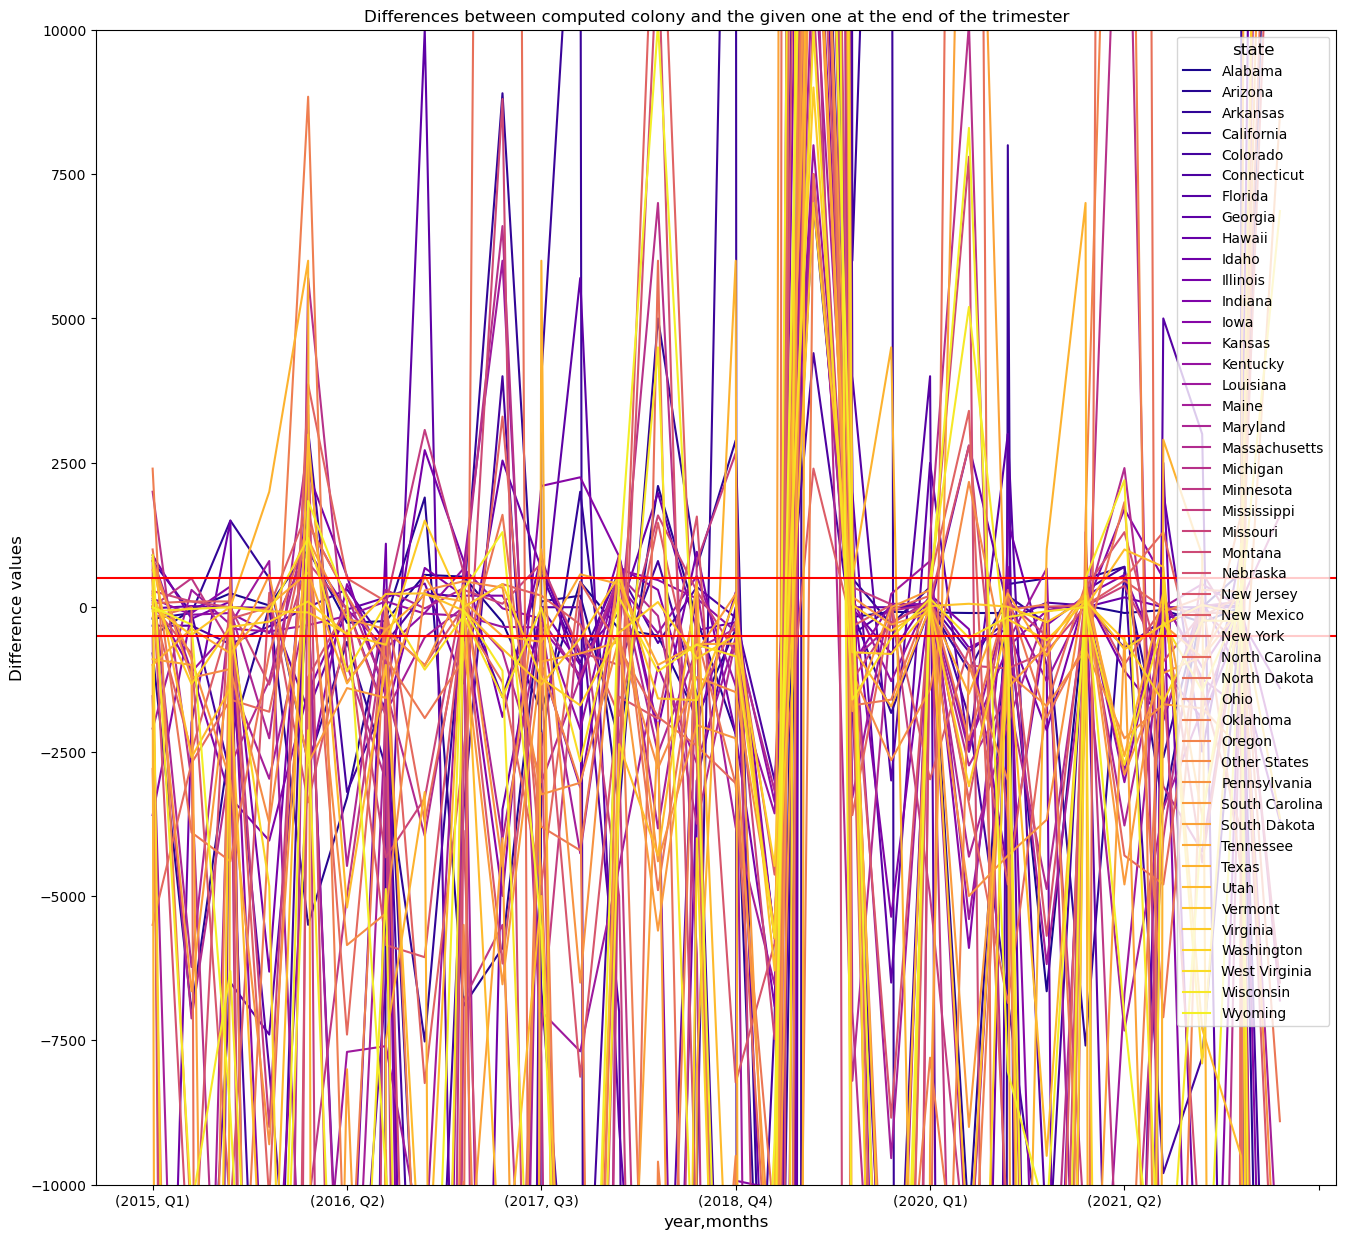

In [19]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Differences between computed colony and the given one at the end of the trimester')
plt.ylabel('Difference values')
df_states["differences"].unstack(level=0).plot(ax=ax,color=custom_states)
#last "differences" value in time for each state (Q2 of 2022) does not hold since it is computed with respect to
#the first timestamp of the next state.
plt.axhline(y=+500, color='r', linestyle='-')
plt.axhline(y=-500, color='r', linestyle='-')
plt.ylim([-10000,+10000])


# Data Exploration

<AxesSubplot:ylabel='year-months-state'>

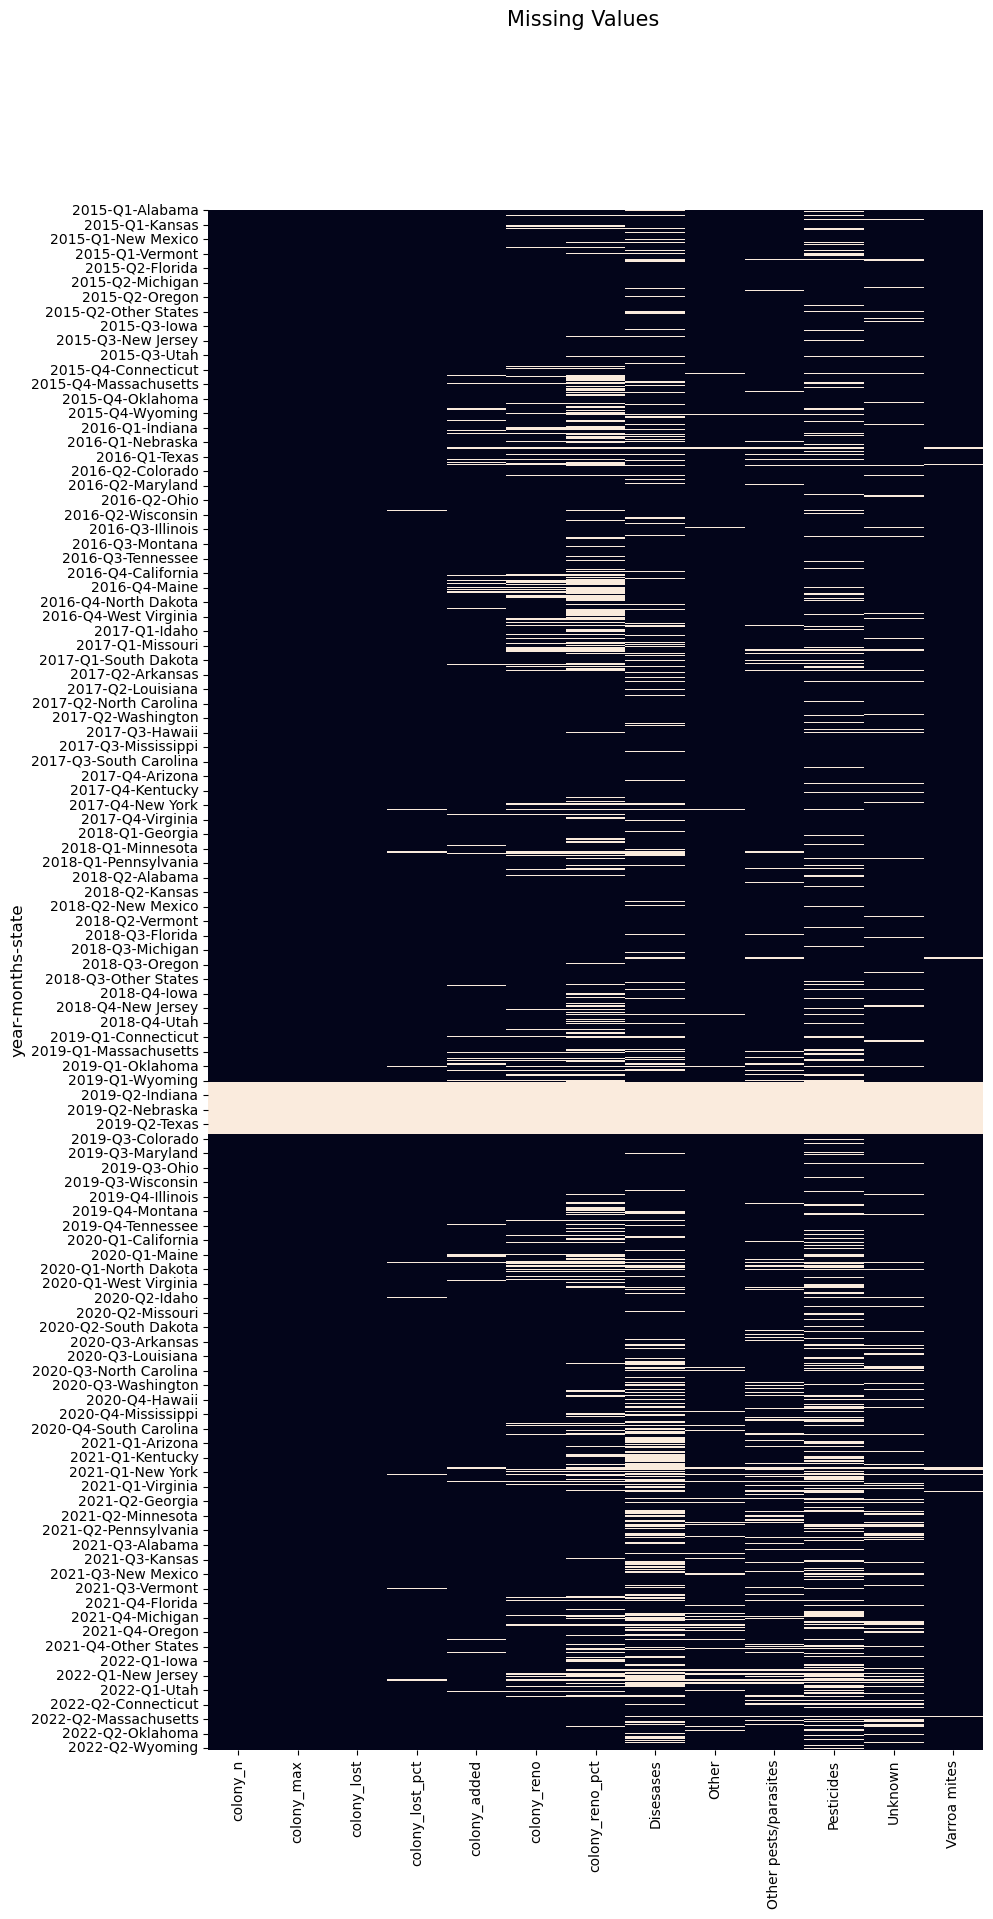

In [20]:
fig, (ax) = plt.subplots(figsize=(10,20))
fig.suptitle('Missing Values')
sns.heatmap(df_years.isnull(), cbar=False, ax=ax)

<AxesSubplot:title={'center':'Number of colonies along time for each state'}, xlabel='year,months', ylabel='Number of colonies'>

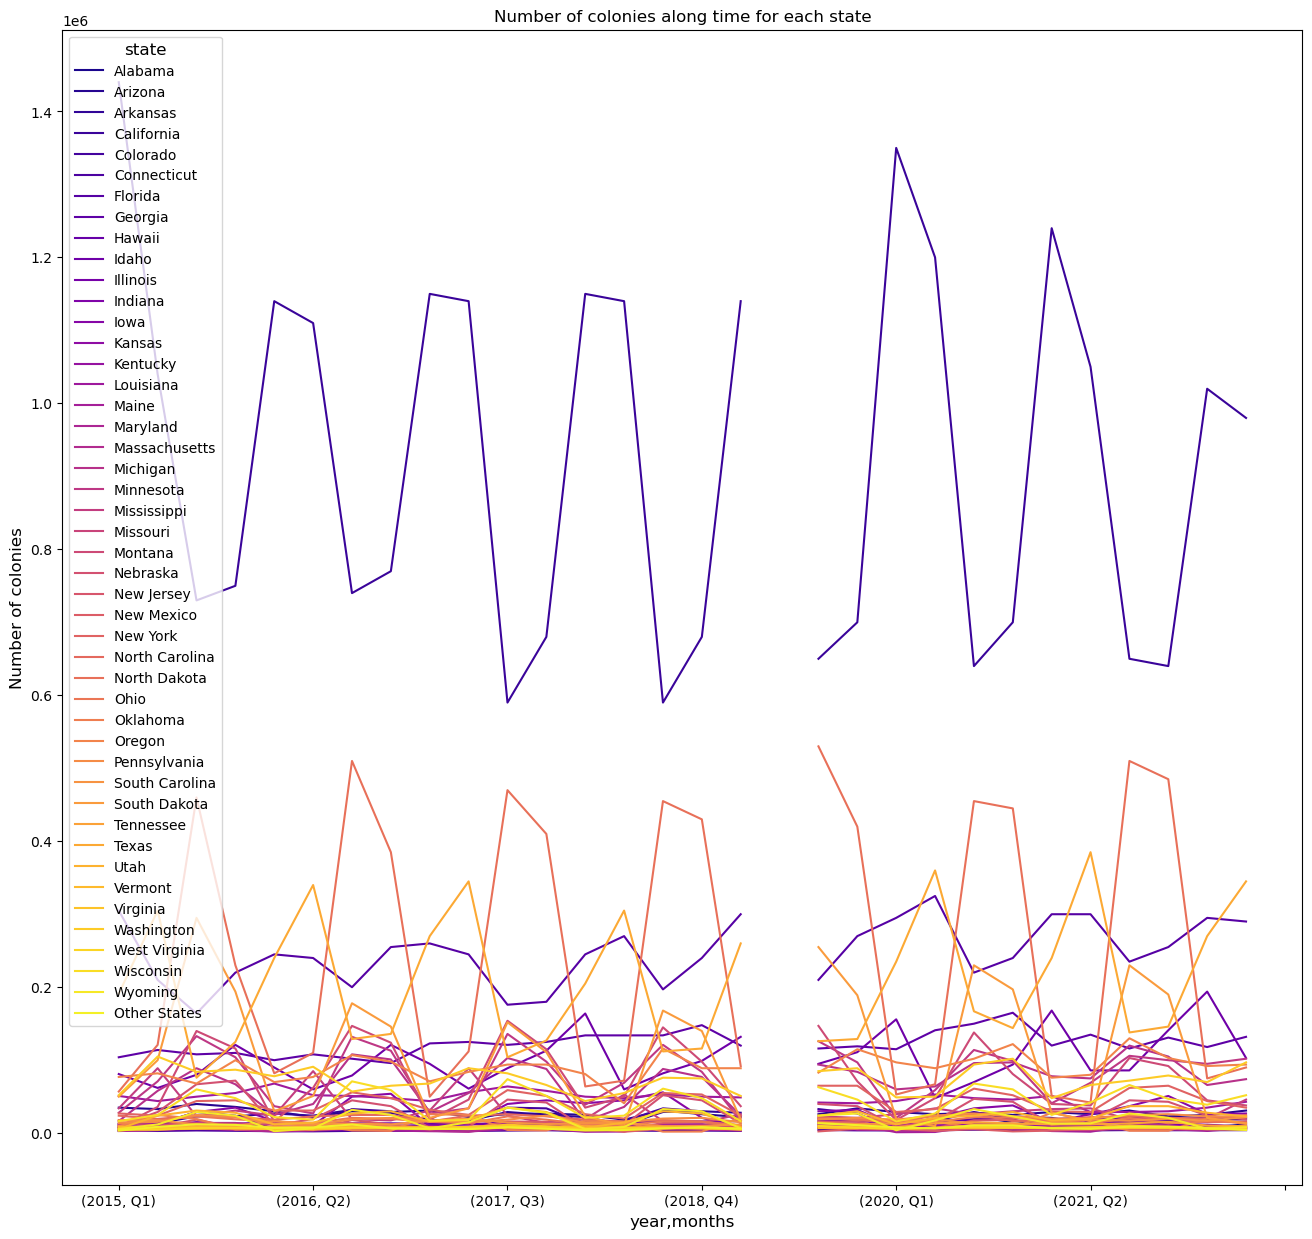

In [21]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of colonies along time for each state')
plt.ylabel('Number of colonies')
df_years["colony_n"].unstack().plot(ax=ax,color=custom_states)

#The state with the highest number of colonies is California

In [22]:
df["season"] = df["months"].apply(lambda x: "Winter" if x == "Q1" or x == "Q4" else "Summer")
#in this case, I considered Q4 2015 as Winter 2015, while it should be Winter 2016 together with Q1 2016
df["year_revisited"] = df.apply(lambda row: row.year + 1 if row.months == "Q4" else row.year, axis=1)
df.head(200)

year months           state   colony_n  colony_max  colony_lost  \
0    2015     Q1         Alabama     7000.0      7000.0       1800.0   
1    2015     Q1         Arizona    35000.0     35000.0       4600.0   
2    2015     Q1        Arkansas    13000.0     14000.0       1500.0   
3    2015     Q1      California  1440000.0   1690000.0     255000.0   
4    2015     Q1        Colorado     3500.0     12500.0       1500.0   
5    2015     Q1     Connecticut     3900.0      3900.0        870.0   
6    2015     Q1         Florida   305000.0    315000.0      42000.0   
7    2015     Q1         Georgia   104000.0    105000.0      14500.0   
8    2015     Q1          Hawaii    10500.0     10500.0        380.0   
9    2015     Q1           Idaho    81000.0     88000.0       3700.0   
10   2015     Q1        Illinois     6000.0     10500.0       4200.0   
11   2015     Q1         Indiana     9000.0      9500.0       2100.0   
12   2015     Q1            Iowa    12500.0     17500.0       3100.0   
13   2015     Q1          Kansas     4600.0      7000.0       1600.0   
14   2015     Q1        Kentucky     7500.0     10500.0       4100.0   
15   2015     Q1       Louisiana    51000.0     51000.0       8000.0   
16   2015     Q1           Maine     3100.0      6500.0        380.0   
17   2015     Q1        Maryland     7500.0     10000.0       4100.0   
18   2015     Q1   Massachusetts     2900.0      4600.0       1000.0   
19   2015     Q1        Michigan    16500.0     60000.0      11500.0   
20   2015     Q1       Minnesota    28000.0     74000.0       3700.0   
21   2015     Q1     Mississippi    34000.0     76000.0       8500.0   
22   2015     Q1        Missouri    12000.0     13000.0       2000.0   
23   2015     Q1         Montana     8500.0     36000.0       2200.0   
24   2015     Q1        Nebraska    10000.0     31000.0       2600.0   
25   2015     Q1      New Jersey     6000.0      9000.0       1100.0   
26   2015     Q1      New Mexico     7000.0      7000.0        690.0   
27   2015     Q1        New York    27000.0     30000.0       6500.0   
28   2015     Q1  North Carolina    24000.0     26000.0       7000.0   
29   2015     Q1    North Dakota    57000.0    120000.0        620.0   
30   2015     Q1            Ohio    18000.0     22000.0      10500.0   
31   2015     Q1        Oklahoma     9500.0     26000.0       6000.0   
32   2015     Q1          Oregon    77000.0     87000.0       6500.0   
33   2015     Q1    Pennsylvania    14000.0     21000.0       6500.0   
34   2015     Q1  South Carolina    17000.0     17500.0       2700.0   
35   2015     Q1    South Dakota    50000.0     97000.0       4600.0   
36   2015     Q1       Tennessee     9500.0      9500.0       2000.0   
37   2015     Q1           Texas   191000.0    250000.0      26000.0   
38   2015     Q1            Utah     6000.0     24000.0       3300.0   
39   2015     Q1         Vermont     5500.0      5500.0        700.0   
40   2015     Q1        Virginia     8000.0      9000.0       2500.0   
41   2015     Q1      Washington    52000.0    105000.0      14000.0   
42   2015     Q1   West Virginia     4700.0      6000.0       1800.0   
43   2015     Q1       Wisconsin    16500.0     29000.0       8000.0   
44   2015     Q1         Wyoming     5500.0     12000.0       2000.0   
45   2015     Q1    Other States     3410.0      8990.0       2080.0   
47   2015     Q2         Alabama     7500.0      7500.0        860.0   
48   2015     Q2         Arizona    33000.0     33000.0       5500.0   
49   2015     Q2        Arkansas    13500.0     13500.0       1900.0   
50   2015     Q2      California  1040000.0   1050000.0     104000.0   
51   2015     Q2        Colorado    12000.0     25000.0       1900.0   
52   2015     Q2     Connecticut     3000.0      3000.0         80.0   
53   2015     Q2         Florida   210000.0    215000.0      35000.0   
54   2015     Q2         Georgia   114000.0    124000.0      23000.0   
55   2015     Q2          Hawaii    13500.0  

In [23]:
cols_temp = ["year_revisited", "season", "state", "colony_lost_pct"]
df_temp = df.loc[:,cols_temp]
df_temp = df_temp.groupby(["year_revisited", "season"]).mean()
display(df_temp)

'''
cols_temp = ["year", "season", "state", "colony_lost_pct"]
df_temp2 = df.loc[:,cols_temp]
df_temp2 = df_temp2.groupby(["year", "season"]).mean()
df_temp2
'''

colony_lost_pct
year_revisited season                 
2015           Summer        10.086957
               Winter        17.913043
2016           Summer         9.956044
               Winter        12.260870
2017           Summer         9.217391
               Winter        13.010870
2018           Summer         9.413043
               Winter        14.211111
2019           Summer        10.978261
               Winter        13.109890
2020           Summer         9.824176
               Winter        10.417582
2021           Summer         8.351648
               Winter        11.769231
2022           Summer         7.804348
               Winter        10.681319

'\ncols_temp = ["year", "season", "state", "colony_lost_pct"]\ndf_temp2 = df.loc[:,cols_temp]\ndf_temp2 = df_temp2.groupby(["year", "season"]).mean()\ndf_temp2\n'

In [24]:
df_temp2 = df_temp.reset_index()
df_temp2.head()

year_revisited  season  colony_lost_pct
0            2015  Summer        10.086957
1            2015  Winter        17.913043
2            2016  Summer         9.956044
3            2016  Winter        12.260870
4            2017  Summer         9.217391

'\n#create your own color array\nmy_colors = ["#9b59b6", "#3498db", \n             "#2ecc71", "#006a4e"]\n  \n# add color array to set_palette\n# function of seaborn\nsns.set_palette(my_colors)\n'

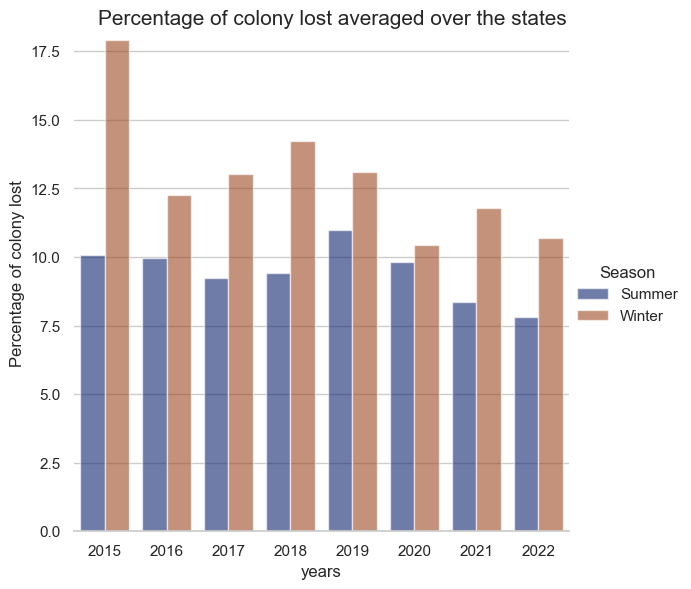

In [25]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_temp2, kind="bar",
    x="year_revisited", y="colony_lost_pct", hue="season", palette="dark", alpha=.6, height=6
) #palette=["k", "b"]
g.despine(left=True)
g.set_axis_labels("years", "Percentage of colony lost")
g.legend.set_title("Season")
g.fig.suptitle("Percentage of colony lost averaged over the states")

'''
#create your own color array
my_colors = ["#9b59b6", "#3498db", 
             "#2ecc71", "#006a4e"]
  
# add color array to set_palette
# function of seaborn
sns.set_palette(my_colors)
'''

In [26]:
cols_temp = ["year_revisited", "season", "colony_lost_pct"]
df_temp3 = df.loc[:,cols_temp]
df_temp3.head()

year_revisited  season  colony_lost_pct
0            2015  Winter             26.0
1            2015  Winter             13.0
2            2015  Winter             11.0
3            2015  Winter             15.0
4            2015  Winter             12.0

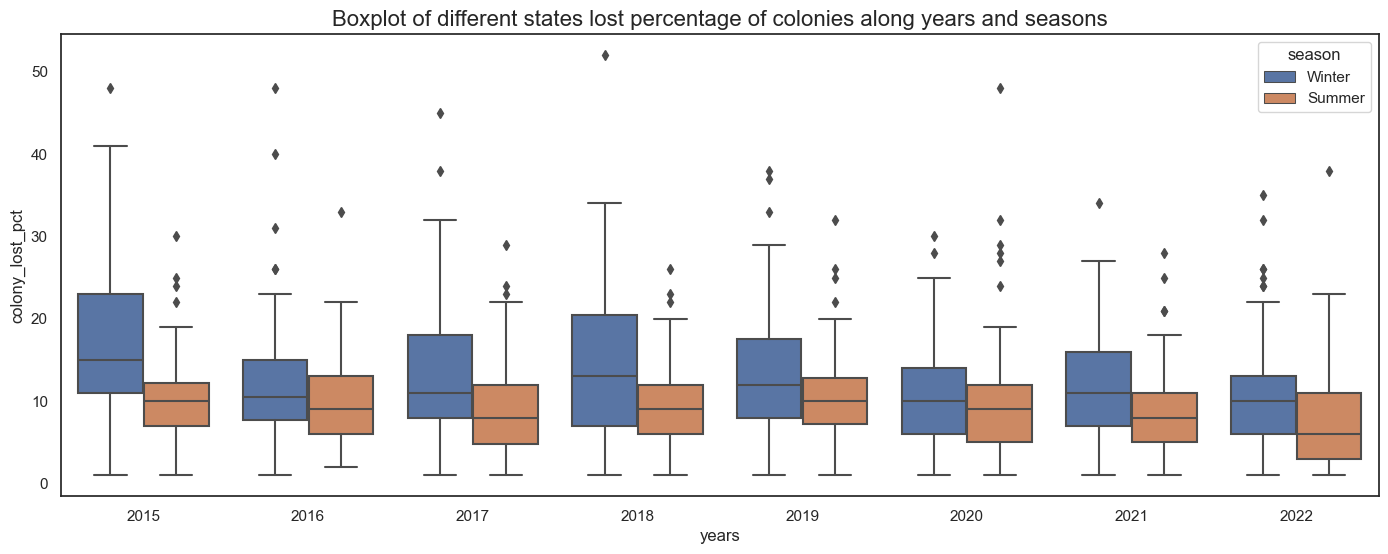

In [27]:
my_colors = ["#9b59b6", "#3498db"]
sns.set_palette(my_colors)
sns.set_theme(style="white")
plt.figure(figsize =(17, 6))
sns.boxplot(x = "year_revisited", y = "colony_lost_pct", data=df_temp3, hue="season")
plt.title("Boxplot of different states lost percentage of colonies along years and seasons", fontsize=16)
plt.xlabel("years")
plt.show()

In [28]:
cols_temp = ["year_revisited", "state", "season", "colony_lost"]
df_temp5 = df.loc[:,cols_temp]
df_temp5 = df_temp5[df_temp5.state != "California"]
df_temp5.head() #NO CALIFORNIA

year_revisited        state  season  colony_lost
0            2015      Alabama  Winter       1800.0
1            2015      Arizona  Winter       4600.0
2            2015     Arkansas  Winter       1500.0
4            2015     Colorado  Winter       1500.0
5            2015  Connecticut  Winter        870.0

In [29]:
np.where(df_temp5.colony_lost > 80000)[0][0]
df_temp5.iloc[118,:] #NORTH DAKOTA PROBLEM

year_revisited            2015
state             North Dakota
season                  Summer
colony_lost            93000.0
Name: 123, dtype: object

In [30]:
df_temp5 = df_temp5[df_temp5.state != "North Dakota"]

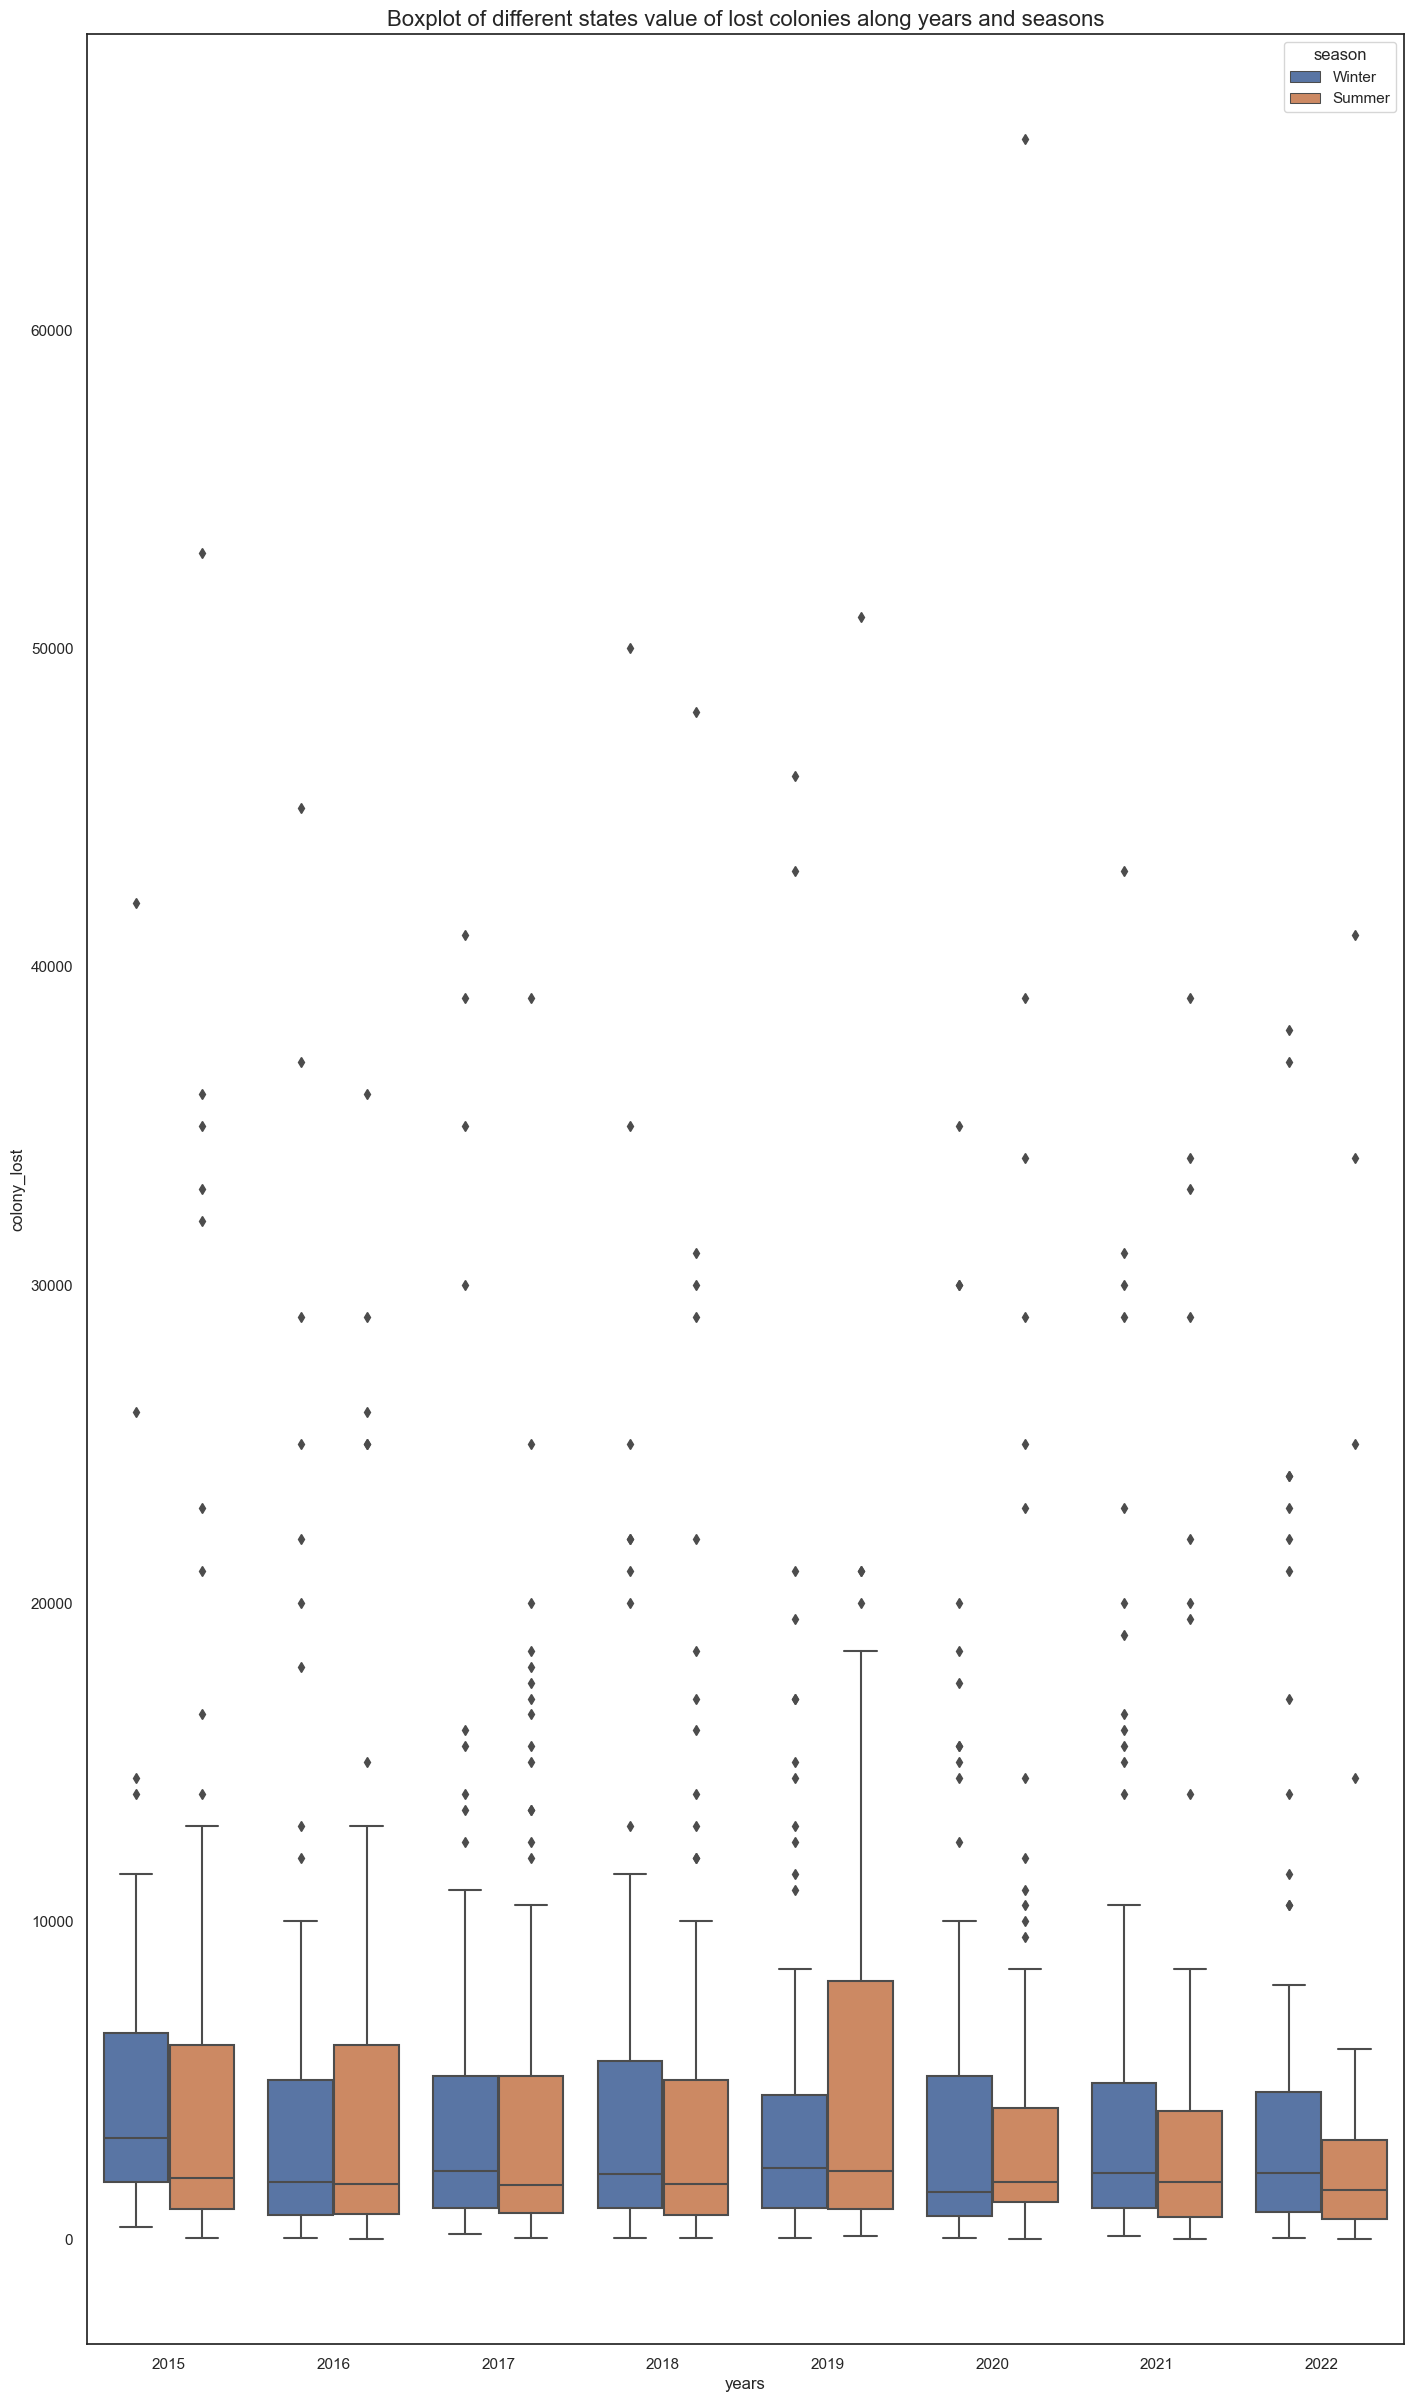

In [31]:
my_colors = ["#9b59b6", "#3498db"]
sns.set_palette(my_colors)
sns.set_theme(style="white")
plt.figure(figsize =(17, 30))
sns.boxplot(x = "year_revisited", y = "colony_lost", data=df_temp5, hue="season")
plt.title("Boxplot of different states value of lost colonies along years and seasons", fontsize=16)
plt.xlabel("years")
plt.show()

In [32]:
df_temp3.head()

year_revisited  season  colony_lost_pct
0            2015  Winter             26.0
1            2015  Winter             13.0
2            2015  Winter             11.0
3            2015  Winter             15.0
4            2015  Winter             12.0

In [33]:
cols_temp = ["year_revisited", "season", "state", "colony_lost_pct"]
df_temp4 = df.loc[:,cols_temp]
df_temp4 = df_temp4.groupby(["year_revisited", "state", "season"]).mean()
#df_temp4.reset_index()
df_temp4.head(200)
df_temp4.to_csv("df_season.csv")

In [34]:
sns.set_theme()

sns.relplot(data = df_temp4, kind ='line', x ="year_revisited", y ="colony_lost_pct", row ="state", hue = "season",
            legend = True, facet_kws=dict(sharex=False, sharey=False), height = 7, aspect=4)
#height: altezza each subplot
#height*aspect = larghezza each subplot

plt.show()

In [35]:
df_US.head()

year months   colony_n  colony_max  colony_lost  colony_lost_pct  \
46   2015     Q1  2824610.0         NaN     500020.0             18.0   
93   2015     Q2  2849500.0         NaN     352860.0             12.0   
140  2015     Q3  3132880.0         NaN     457100.0             15.0   
187  2015     Q4  2874760.0         NaN     412380.0             14.0   
234  2016     Q1  2594590.0         NaN     428800.0             17.0   

     colony_added  colony_reno  colony_reno_pct  Disesases  Other  \
46       546980.0     270530.0             10.0        3.1    6.9   
93       661860.0     692850.0             24.0        4.9   11.6   
140      172990.0     303070.0             10.0        8.0    8.8   
187      117150.0     158790.0              6.0        5.2    7.3   
234      378160.0     158050.0              6.0        6.2    7.0   

     Other pests/parasites  Pesticides  Unknown  Varroa mites  
46                     8.6         7.4      4.3          25.2  
93                    19.5        16.6      3.5          43.4  
140                   17.6        15.2      4.8          41.2  
187                   11.4         9.5      6.9          37.0  
234                   12.6        10.5      5.4          34.3

Text(0.5, 0.98, 'Percentage of colony loss in US')

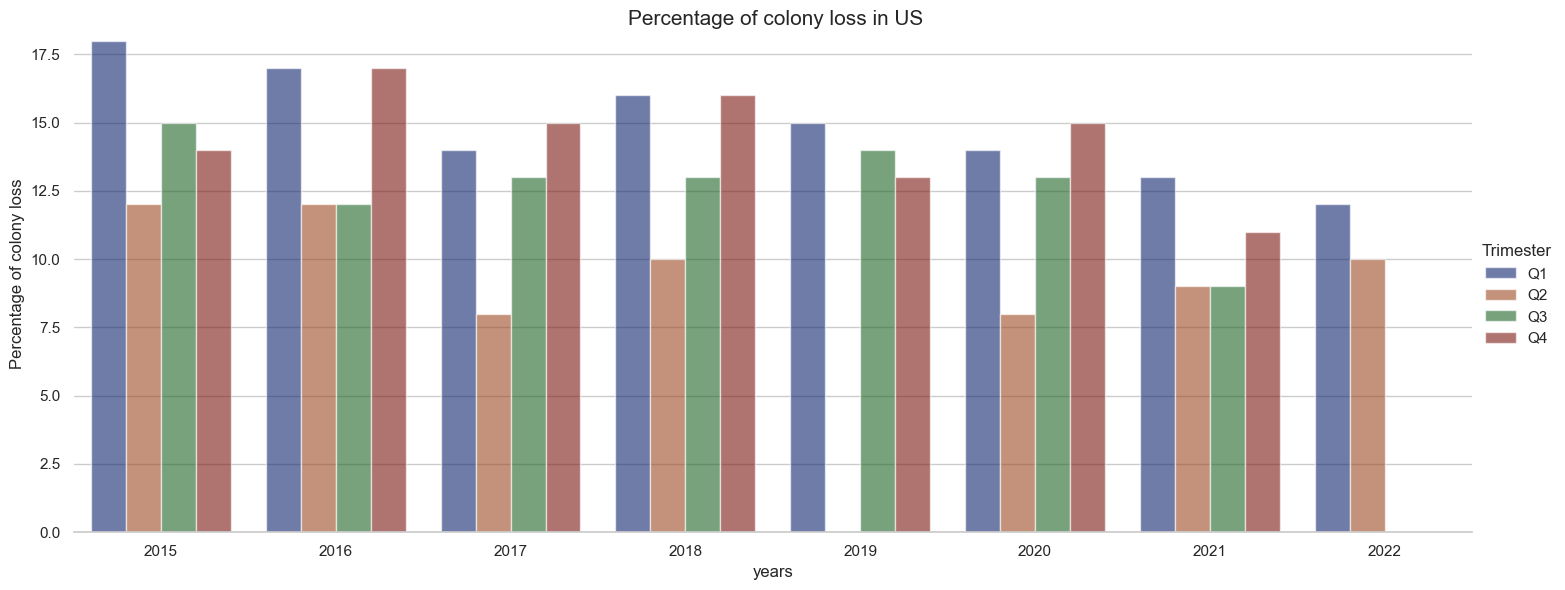

In [36]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_US, kind="bar",
    x="year", y="colony_lost_pct", hue="months", palette="dark", alpha=.6, height=6, aspect=2.5
) #palette=["k", "b"]
g.despine(left=True)
g.set_axis_labels("years", "Percentage of colony loss")
g.legend.set_title("Trimester")
g.fig.suptitle("Percentage of colony loss in US")

<AxesSubplot:title={'center':'Number of colonies along time for each state'}, xlabel='year,months', ylabel='Number of colonies'>

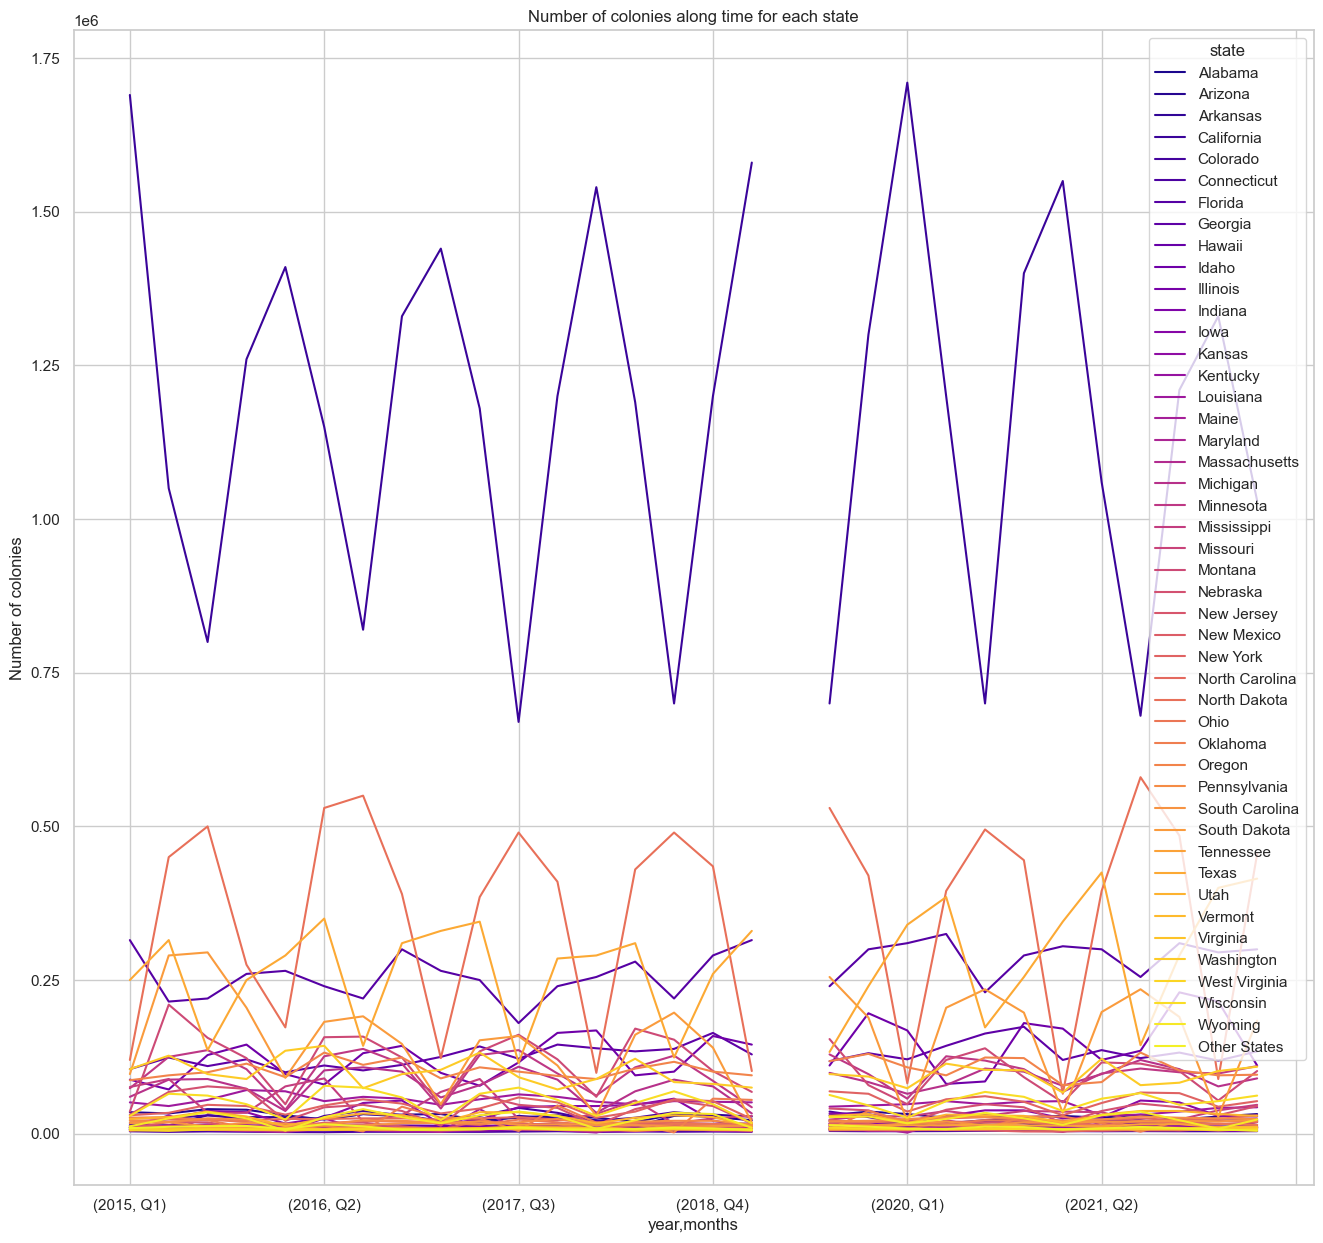

In [37]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of colonies along time for each state')
plt.ylabel('Number of colonies')
df_years["colony_max"].unstack().plot(ax=ax,color=custom_states)

In [38]:
df_years.head()

colony_n  colony_max  colony_lost  colony_lost_pct  \
year months state                                                             
2015 Q1     Alabama        7000.0      7000.0       1800.0             26.0   
            Arizona       35000.0     35000.0       4600.0             13.0   
            Arkansas      13000.0     14000.0       1500.0             11.0   
            California  1440000.0   1690000.0     255000.0             15.0   
            Colorado       3500.0     12500.0       1500.0             12.0   

                        colony_added  colony_reno  colony_reno_pct  Disesases  \
year months state                                                               
2015 Q1     Alabama           2800.0        250.0              4.0        NaN   
            Arizona           3400.0       2100.0              6.0        0.1   
            Arkansas          1200.0         90.0              1.0        1.5   
            California      250000.0     124000.0              7.0        3.0   
            Colorado           200.0        140.0              1.0        1.8   

                        Other  Other pests/parasites  Pesticides  Unknown  \
year months state                                                           
2015 Q1     Alabama       9.1                    5.4         2.2      9.4   
            Arizona       1.8                   20.5         NaN      3.1   
            Arkansas      1.0                   11.4         3.4      1.0   
            California    6.5                    7.2         7.5      2.8   
            Colorado      2.6                    0.9         0.6      5.9   

                        Varroa mites  
year months state                     
2015 Q1     Alabama             10.0  
            Arizona             26.9  
            Arkansas            17.6  
            California          24.7  
            Colorado            14.6

In [39]:
sns.set_theme()

sns.relplot(data = df_years, kind ='line', x =["year", "months"], y ="colony_lost_pct", row ="state", hue = "season",
            legend = True, facet_kws=dict(sharex=False, sharey=False), height = 7, aspect=4)
#height: altezza each subplot
#height*aspect = larghezza each subplot

plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 1380 and the vector passed to `x` has length 2.

# Geospatial Representation

In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc

In [ ]:
pip install pysal

In [ ]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

### Survival

In [65]:
df_states.head()

colony_n  colony_max  colony_lost  colony_lost_pct  \
state   year months                                                       
Alabama 2015 Q1        7000.0      7000.0       1800.0             26.0   
             Q2        7500.0      7500.0        860.0             12.0   
             Q3        8500.0      9000.0       1400.0             16.0   
             Q4        8000.0      8000.0        610.0              8.0   
        2016 Q1        7500.0      7500.0       1700.0             23.0   

                     colony_added  colony_reno  colony_reno_pct  Disesases  \
state   year months                                                          
Alabama 2015 Q1            2800.0        250.0              4.0        0.0   
             Q2            1900.0        680.0              9.0        0.0   
             Q3             160.0        260.0              3.0        0.0   
             Q4              80.0         60.0              1.0        0.2   
        2016 Q1            1200.0        180.0              2.0        4.3   

                     Other  Other pests/parasites  Pesticides  Unknown  \
state   year months                                                      
Alabama 2015 Q1        9.1                    5.4         2.2      9.4   
             Q2        3.2                   42.5         2.3      4.1   
             Q3        2.2                   70.6         2.6     17.7   
             Q4        2.8                    6.4         0.2      1.9   
        2016 Q1        2.4                   22.0         8.1     11.3   

                     Varroa mites  colony_end  colony_end_computed  \
state   year months                                                  
Alabama 2015 Q1              10.0      7500.0               8000.0   
             Q2              16.7      8500.0               8540.0   
             Q3              63.1      8000.0               7760.0   
             Q4               3.1      7500.0               7470.0   
        2016 Q1              24.2      8000.0               7000.0   

                     differences  
state   year months               
Alabama 2015 Q1           -500.0  
             Q2            -40.0  
             Q3            240.0  
             Q4             30.0  
        2016 Q1           1000.0

In [66]:
df_states2 = df_states[["colony_n", "colony_end_computed"]]
df_states2.head()

colony_n  colony_end_computed
state   year months                               
Alabama 2015 Q1        7000.0               8000.0
             Q2        7500.0               8540.0
             Q3        8500.0               7760.0
             Q4        8000.0               7470.0
        2016 Q1        7500.0               7000.0

In [67]:
df_states2["percentage end colonies"] = (df_states2.colony_end_computed - df_states2.colony_n)/df_states2.colony_n
df_states2.head()

colony_n  colony_end_computed  percentage end colonies
state   year months                                                        
Alabama 2015 Q1        7000.0               8000.0                 0.142857
             Q2        7500.0               8540.0                 0.138667
             Q3        8500.0               7760.0                -0.087059
             Q4        8000.0               7470.0                -0.066250
        2016 Q1        7500.0               7000.0                -0.066667

In [68]:
df_states2['cumulative percentage'] = df_states2.groupby(['state'])['percentage end colonies'].transform('cumsum')

In [69]:
df_states2.head(100)

colony_n  colony_end_computed  \
state      year months                                   
Alabama    2015 Q1         7000.0               8000.0   
                Q2         7500.0               8540.0   
                Q3         8500.0               7760.0   
                Q4         8000.0               7470.0   
           2016 Q1         7500.0               7000.0   
                Q2         8000.0               8270.0   
                Q3         8000.0               7240.0   
                Q4         7000.0               6440.0   
           2017 Q1         7000.0               5970.0   
                Q2         6500.0               7260.0   
                Q3         7000.0               9290.0   
                Q4         7500.0               7060.0   
           2018 Q1         7500.0               7880.0   
                Q2         7500.0               8990.0   
                Q3         8500.0               8400.0   
                Q4         6500.0               5880.0   
           2019 Q1         5500.0               5650.0   
                Q2            0.0                  0.0   
                Q3         7000.0               6170.0   
                Q4         6000.0               5580.0   
           2020 Q1         5500.0               8590.0   
                Q2         8500.0               9100.0   
                Q3         9000.0              17100.0   
                Q4        17000.0              16650.0   
           2021 Q1        10000.0               9470.0   
                Q2         9500.0               9600.0   
                Q3         9500.0               9050.0   
                Q4         9000.0               8260.0   
           2022 Q1         8000.0              12000.0   
                Q2        12000.0              15300.0   
Arizona    2015 Q1        35000.0              33800.0   
                Q2        33000.0              47000.0   
                Q3        40000.0              38300.0   
                Q4        36000.0              30000.0   
           2016 Q1        30000.0              27500.0   
                Q2        22000.0              33300.0   
                Q3        30000.0              29200.0   
                Q4        29000.0              29100.0   
           2017 Q1        31000.0              28900.0   
                Q2        22000.0              31900.0   
                Q3        26000.0              26900.0   
                Q4        27000.0              24800.0   
           2018 Q1        25000.0              20810.0   
                Q2        18500.0              28900.0   
                Q3        31000.0              26200.0   
                Q4        26000.0              24200.0   
           2019 Q1        22000.0              19930.0   
                Q2            0.0                  0.0   
                Q3        26000.0              33500.0   
                Q4        34000.0              29300.0   
           2020 Q1        29000.0              25650.0   
                Q2        26000.0              38700.0   
                Q3        28000.0              24600.0   
                Q4        25000.0              28500.0   
           2021 Q1        29000.0              25500.0   
                Q2        26000.0              30300.0   
                Q3        31000.0              26500.0   
                Q4        23000.0              25000.0   
           2022 Q1        25000.0              30400.0   
                Q2        31000.0              46400.0   
Arkansas   2015 Q1        13000.0              13700.0   
                Q2        13500.0              23100.0   
                Q3        23000.0              21500.0   
                Q4        23000.0              26500.0   
           2016 Q1        27000.0              26700.0   
                Q2        24000.0              32600.0   
                Q3        32000.0              30770.0   
                Q4     

In [72]:
df_states2[df_states2["cumulative percentage"] < 0]

colony_n  colony_end_computed  \
state       year months                                  
Alabama     2016 Q4        7000.0               6440.0   
            2017 Q1        7000.0               5970.0   
                 Q2        6500.0               7260.0   
Arizona     2015 Q1       35000.0              33800.0   
Connecticut 2015 Q1        3900.0               3320.0   
Indiana     2015 Q1        9000.0               7890.0   
Kentucky    2015 Q1        7500.0               6650.0   
            2016 Q1        7000.0               5810.0   
Louisiana   2015 Q1       51000.0              46100.0   
Missouri    2015 Q1       12000.0              11220.0   
New Mexico  2015 Q1        7000.0               6500.0   
New York    2015 Q1       27000.0              23930.0   
Ohio        2015 Q1       18000.0              16500.0   
Tennessee   2015 Q1        9500.0               8500.0   
Virginia    2015 Q1        8000.0               7300.0   
            2016 Q1        6500.0               5900.0   

                         percentage end colonies  cumulative percentage  \
state       year months                                                   
Alabama     2016 Q4                    -0.080000              -0.079702   
            2017 Q1                    -0.147143              -0.226845   
                 Q2                     0.116923              -0.109921   
Arizona     2015 Q1                    -0.034286              -0.034286   
Connecticut 2015 Q1                    -0.148718              -0.148718   
Indiana     2015 Q1                    -0.123333              -0.123333   
Kentucky    2015 Q1                    -0.113333              -0.113333   
            2016 Q1                    -0.170000              -0.040725   
Louisiana   2015 Q1                    -0.096078              -0.096078   
Missouri    2015 Q1                    -0.065000              -0.065000   
New Mexico  2015 Q1                    -0.071429              -0.071429   
New York    2015 Q1                    -0.113704              -0.113704   
Ohio        2015 Q1                    -0.083333              -0.083333   
Tennessee   2015 Q1                    -0.105263              -0.105263   
Virginia    2015 Q1                    -0.087500              -0.087500   
            2016 Q1                    -0.092308              -0.055808   

                           cumsum  
state       year months            
Alabama     2016 Q4     -0.079702  
            2017 Q1     -0.226845  
                 Q2     -0.109921  
Arizona     2015 Q1     -0.034286  
Connecticut 2015 Q1     -0.148718  
Indiana     2015 Q1     -0.123333  
Kentucky    2015 Q1     -0.113333  
            2016 Q1     -0.040725  
Louisiana   2015 Q1     -0.096078  
Missouri    2015 Q1     -0.065000  
New Mexico  2015 Q1     -0.071429  
New York    2015 Q1     -0.113704  
Ohio        2015 Q1     -0.083333  
Tennessee   2015 Q1     -0.105263  
Virginia    2015 Q1     -0.087500  
            2016 Q1     -0.055808